# Intro

Remarque : Quatre ensembles de données sont disponibles :

L'ensemble de données FD001 est le premier de la série et le moins complexe.

Trajectoires d'entraînement : 100

Trajectoires de test : 100

Conditions : UNE (Niveau de la mer)

Modes de défaillance : UN (Dégradation HPC)

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Commençons par charger les données et démarrer notre Analyse Exploratoire des Données (EDA) en inspectant les premières lignes, afin de nous familiariser avec la structure des données.

In [ ]:
# define filepath to read data
dir_path = './CMAPSSData/'

# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)]
col_names = index_names + setting_names + sensor_names

# read data
train = pd.read_csv((dir_path+'train_FD001.txt'), sep='\s+', header=None, names=col_names)
x_test = pd.read_csv((dir_path+'test_FD001.txt'), sep='\s+', header=None, names=col_names)
y_test = pd.read_csv((dir_path+'RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

train.head()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1        1            2     0.0019    -0.0003      100.0  518.67  642.15   
2        1            3    -0.0043     0.0003      100.0  518.67  642.35   
3        1            4     0.0007     0.0000      100.0  518.67  642.35   
4        1            5    -0.0019    -0.0002      100.0  518.67  642.37   

       s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  s_17  \
0  1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   392   
1  1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   392   
2  1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   390   
3  1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   392   
4  1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   393   

   s_18   s_19   s_20     s_21  
0  2388  100.0  39.06  23.4190  
1  2388  100.0  39.00  23.4236  
2  2388  100.0  38.95  23.3442  
3  2388  100.0  38.88  23.3739  
4  2388  100.0  38.90  23.4044  

[5 rows x 26 columns]

In [ ]:
#Supprimer toutes les lignes supplémentaires et conserver uniquement le dernier cycle de chaque moteur.
x_test=x_test.groupby('unit_nr').last().reset_index()
x_test.shape

(100, 26)

In [ ]:
# Imputer les NAN avec la moyenne
train.fillna(train.mean(), inplace=True)
x_test.fillna(x_test.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)



##Vérification des valeurs manquantes:

In [ ]:
def check_missing_values(data):
    print('Verifing the existance of null data:')
    return data.isnull().sum()

print(check_missing_values(train))

Verifing the existance of null data:
unit_nr        0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64




## Statistiques descriptives

In [ ]:
# inspect unit_nr
train[index_names].describe()

unit_nr   time_cycles
count  20631.000000  20631.000000
mean      51.506568    108.807862
std       29.227633     68.880990
min        1.000000      1.000000
25%       26.000000     52.000000
50%       52.000000    104.000000
75%       77.000000    156.000000
max      100.000000    362.000000

In [ ]:
# inspect time cycles
train[index_names].groupby('unit_nr').max().describe()

time_cycles
count   100.000000
mean    206.310000
std      46.342749
min     128.000000
25%     177.000000
50%     199.000000
75%     229.250000
max     362.000000

In [ ]:
# inspect settings
train[setting_names].describe()

setting_1     setting_2  setting_3
count  20631.000000  20631.000000    20631.0
mean      -0.000009      0.000002      100.0
std        0.002187      0.000293        0.0
min       -0.008700     -0.000600      100.0
25%       -0.001500     -0.000200      100.0
50%        0.000000      0.000000      100.0
75%        0.001500      0.000300      100.0
max        0.008700      0.000600      100.0

In [ ]:
# inspect sensor values
train[sensor_names].describe().transpose()

count         mean           std        min        25%        50%  \
s_1   20631.0   518.670000  6.537152e-11   518.6700   518.6700   518.6700   
s_2   20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   
s_3   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000   
s_4   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400   
s_5   20631.0    14.620000  3.394700e-12    14.6200    14.6200    14.6200   
s_6   20631.0    21.609803  1.388985e-03    21.6000    21.6100    21.6100   
s_7   20631.0   553.367711  8.850923e-01   549.8500   552.8100   553.4400   
s_8   20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500  2388.0900   
s_9   20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000  9060.6600   
s_10  20631.0     1.300000  4.660829e-13     1.3000     1.3000     1.3000   
s_11  20631.0    47.541168  2.670874e-01    46.8500    47.3500    47.5100   
s_12  20631.0   521.413470  7.375534e-01   518.6900   520.9600   521.4800   
s_13  20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400  2388.0900   
s_14  20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450  8140.5400   
s_15  20631.0     8.442146  3.750504e-02     8.3249     8.4149     8.4389   
s_16  20631.0     0.030000  1.556432e-14     0.0300     0.0300     0.0300   
s_17  20631.0   393.210654  1.548763e+00   388.0000   392.0000   393.0000   
s_18  20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
s_19  20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
s_20  20631.0    38.816271  1.807464e-01    38.1400    38.7000    38.8300   
s_21  20631.0    23.289705  1.082509e-01    22.8942    23.2218    23.2979   

            75%        max  
s_1    518.6700   518.6700  
s_2    643.0000   644.5300  
s_3   1594.3800  1616.9100  
s_4   1414.5550  1441.4900  
s_5     14.6200    14.6200  
s_6     21.6100    21.6100  
s_7    554.0100   556.0600  
s_8   2388.1400  2388.5600  
s_9   9069.4200  9244.5900  
s_10     1.3000     1.3000  
s_11    47.7000    48.5300  
s_12   521.9500   523.3800  
s_13  2388.1400  2388.5600  
s_14  8148.3100  8293.7200  
s_15     8.4656     8.5848  
s_16     0.0300     0.0300  
s_17   394.0000   400.0000  
s_18  2388.0000  2388.0000  
s_19   100.0000   100.0000  
s_20    38.9500    39.4300  
s_21    23.3668    23.6184

In [ ]:
#Avant de commencer à tracer les données, calculons le RUL (Remaining Useful Life).

In [ ]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()

    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)

    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life

    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

train = add_remaining_useful_life(train)
train[index_names+['RUL']].head()

unit_nr  time_cycles  RUL
0        1            1  191
1        1            2  190
2        1            3  189
3        1            4  188
4        1            5  187

## Plotting

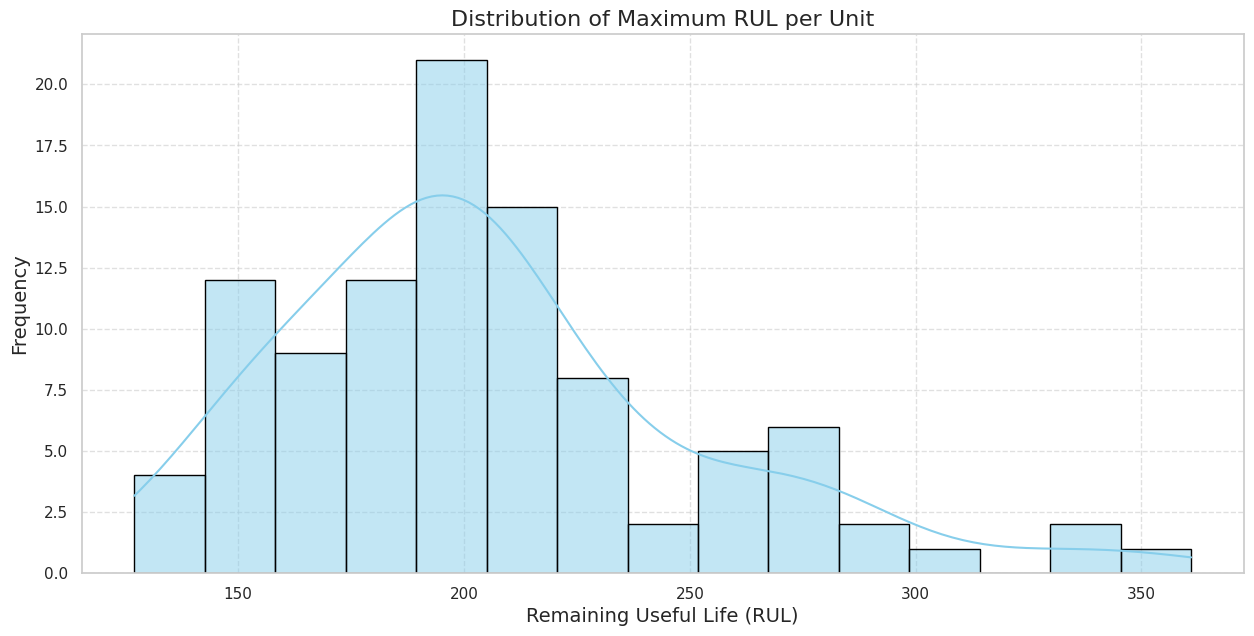

In [ ]:
#plotting
#faire des represetation graphique
# est important pour comprendre les districutions
df_max_rul = train[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index()
# Configuration du style pour améliorer l'apparence
sns.set_theme(style="whitegrid")

# Histogramme avec des ajustements
plt.figure(figsize=(15, 7))
sns.histplot(df_max_rul['RUL'], bins=15, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Maximum RUL per Unit', fontsize=16)
plt.xlabel('Remaining Useful Life (RUL)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



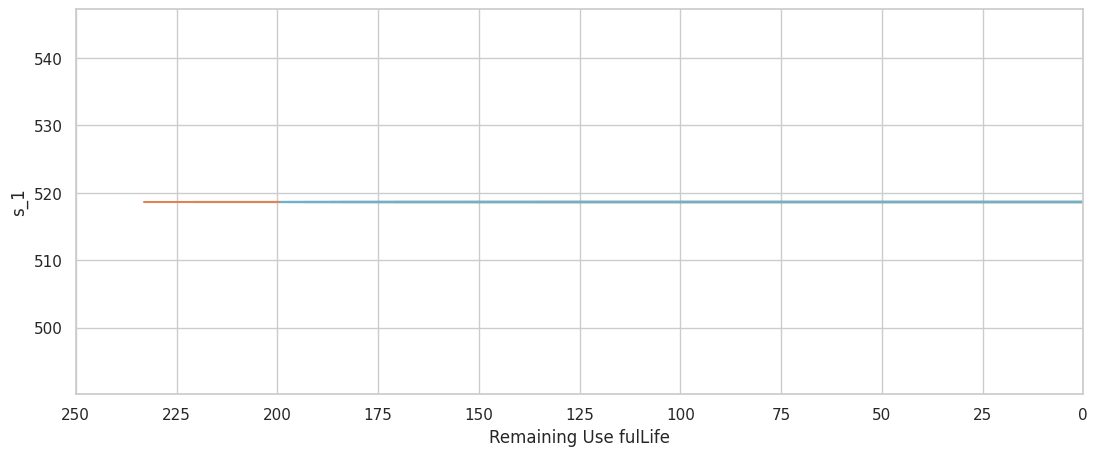

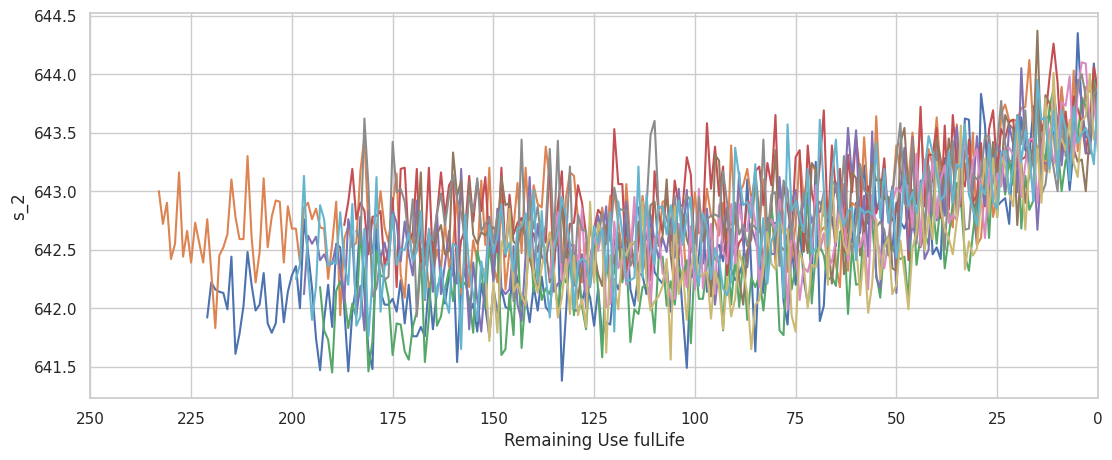

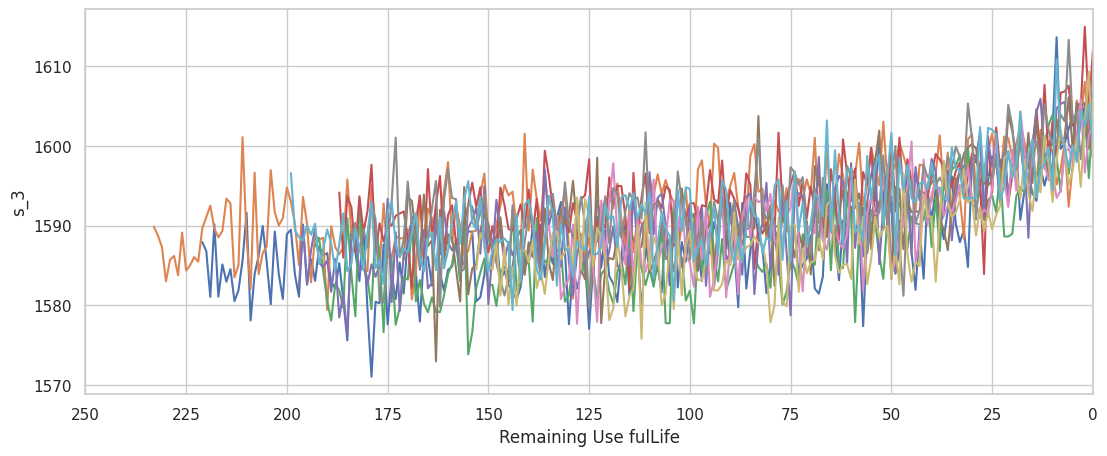

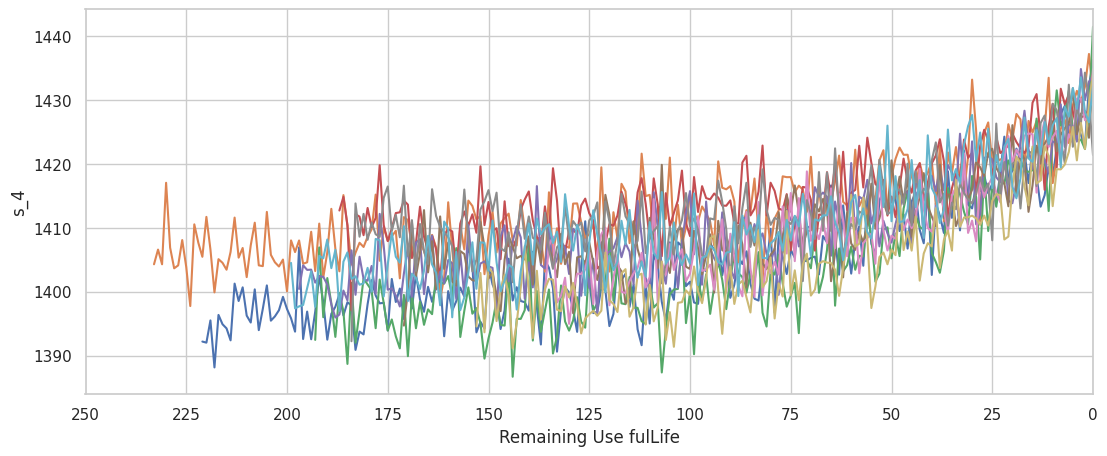

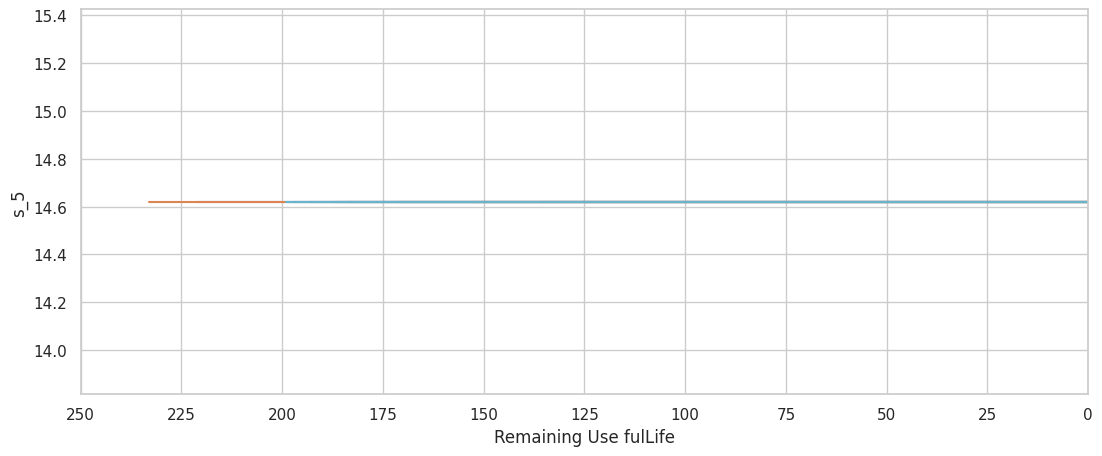

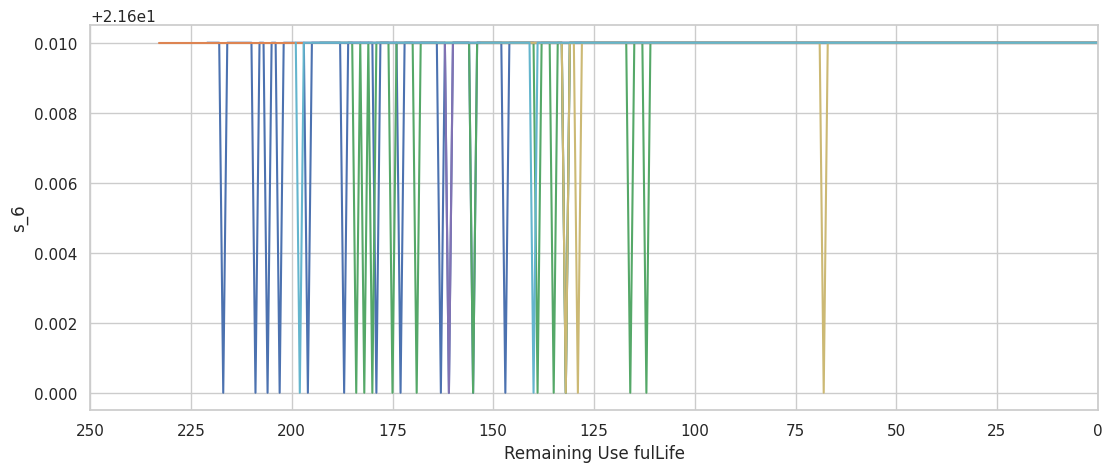

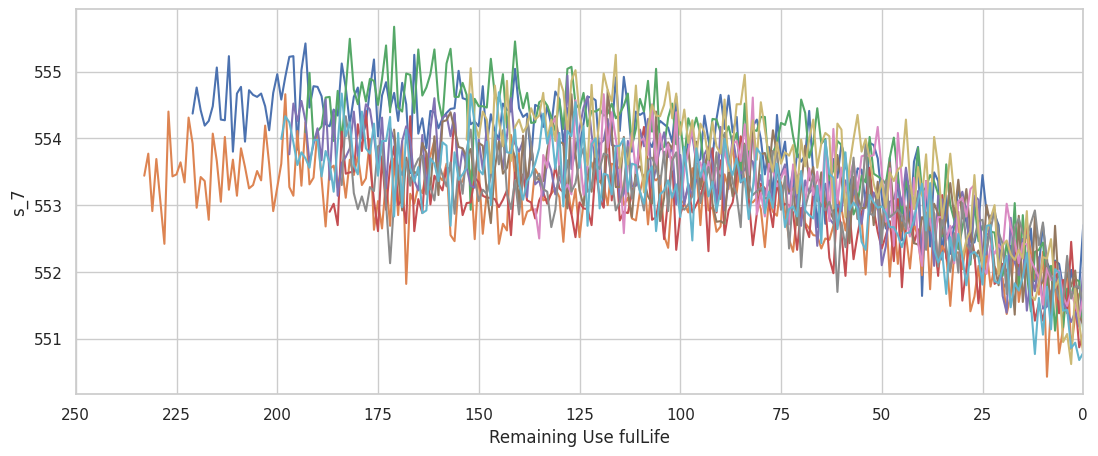

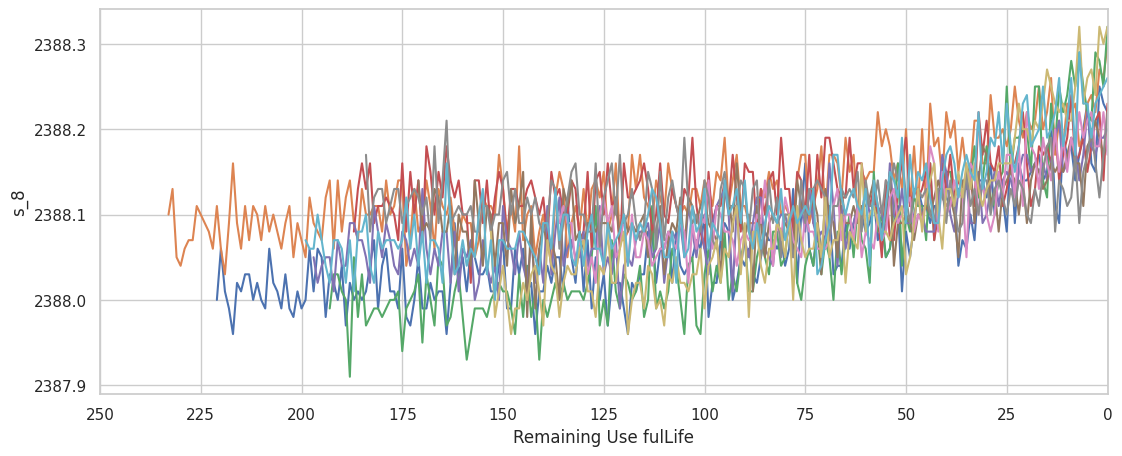

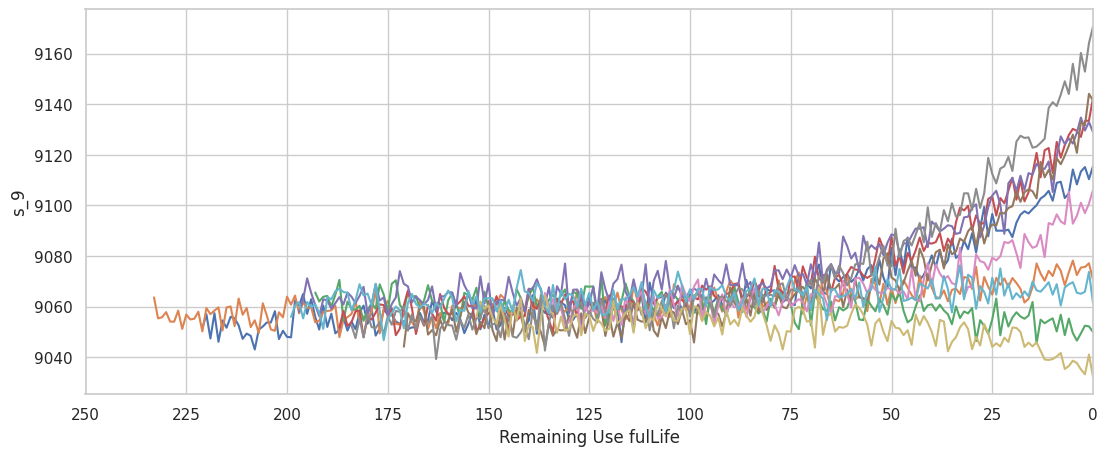

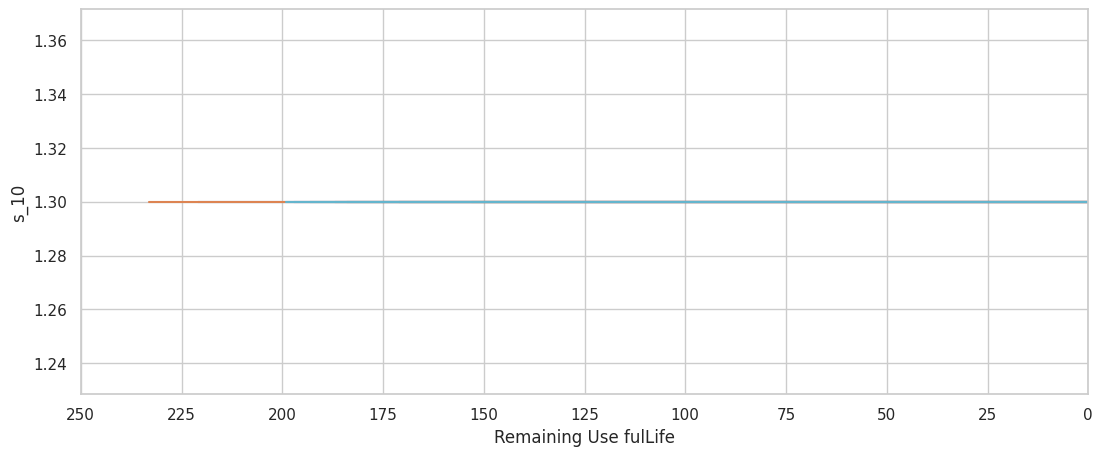

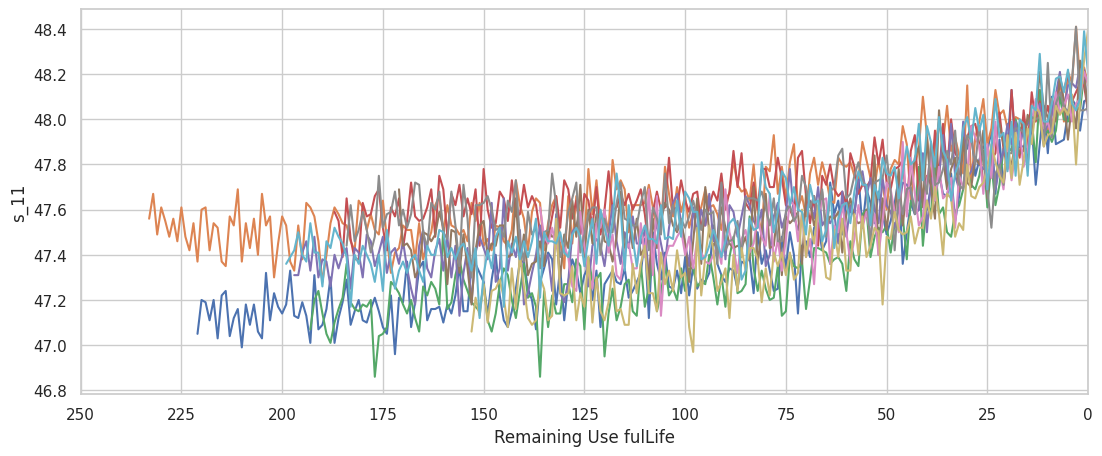

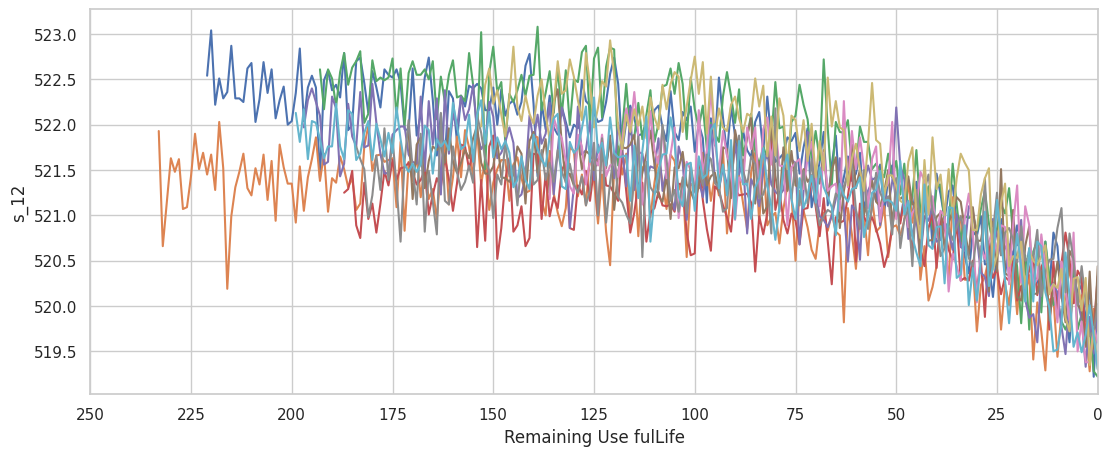

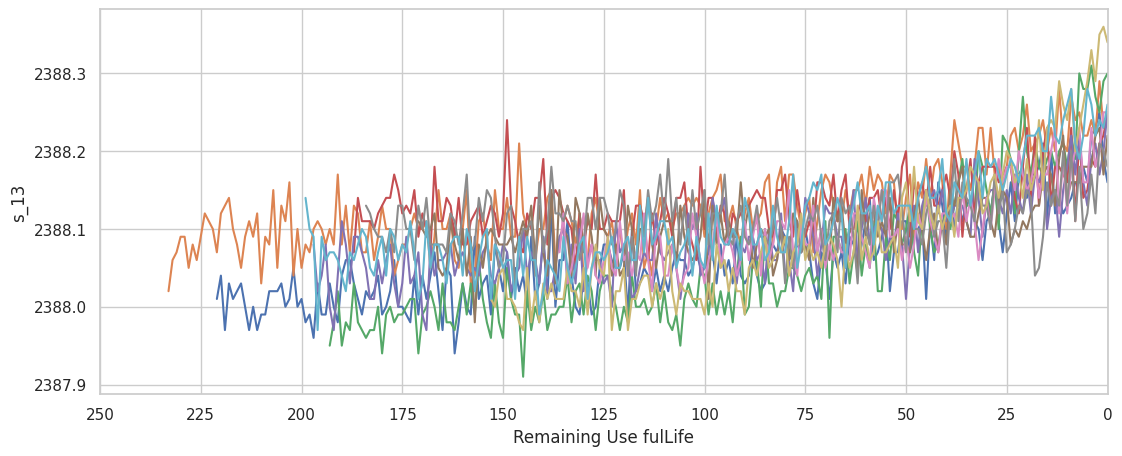

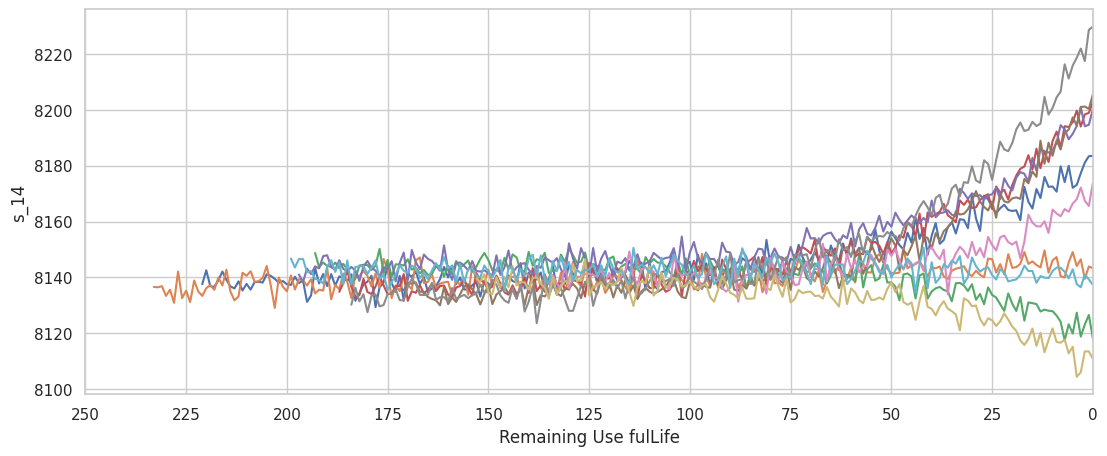

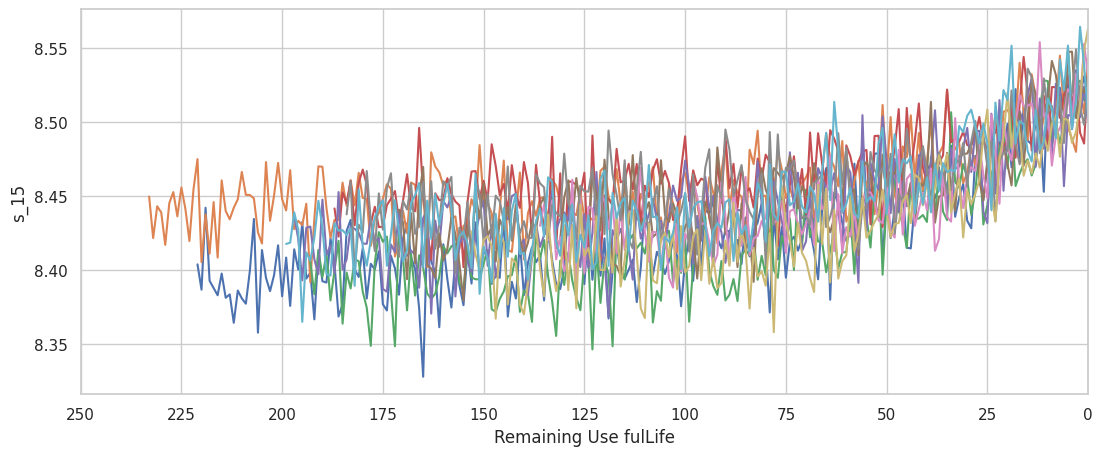

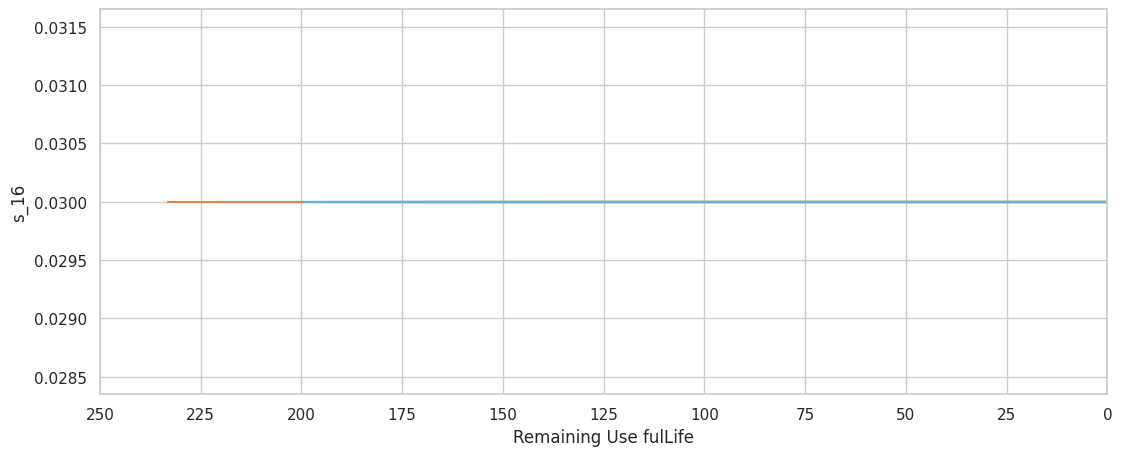

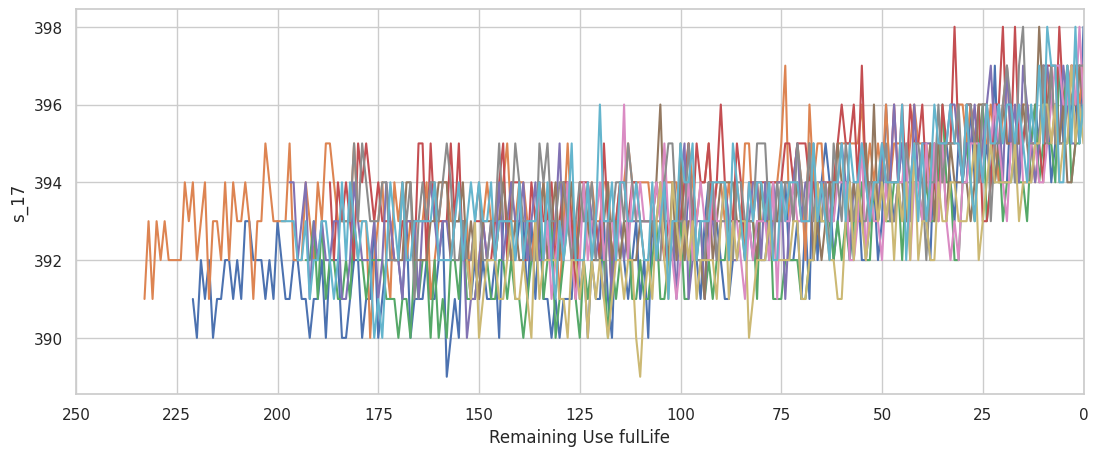

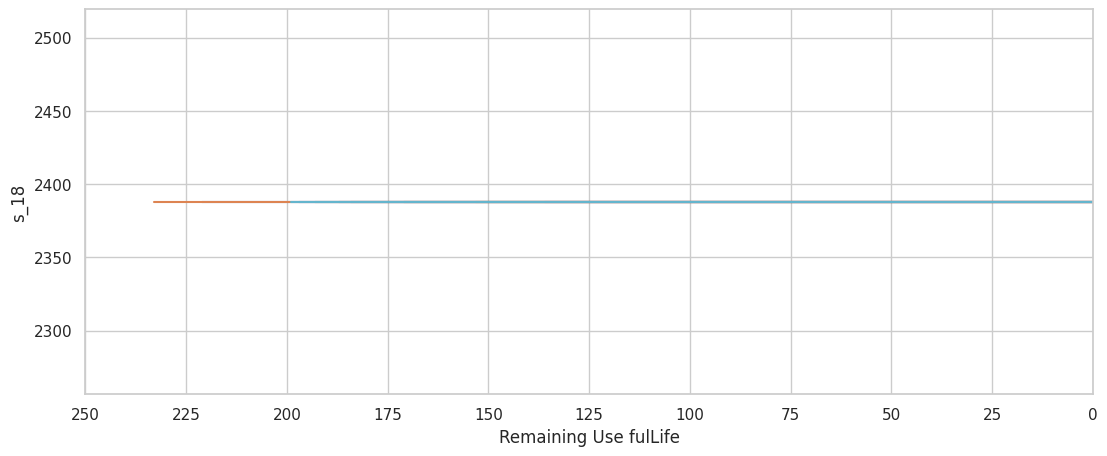

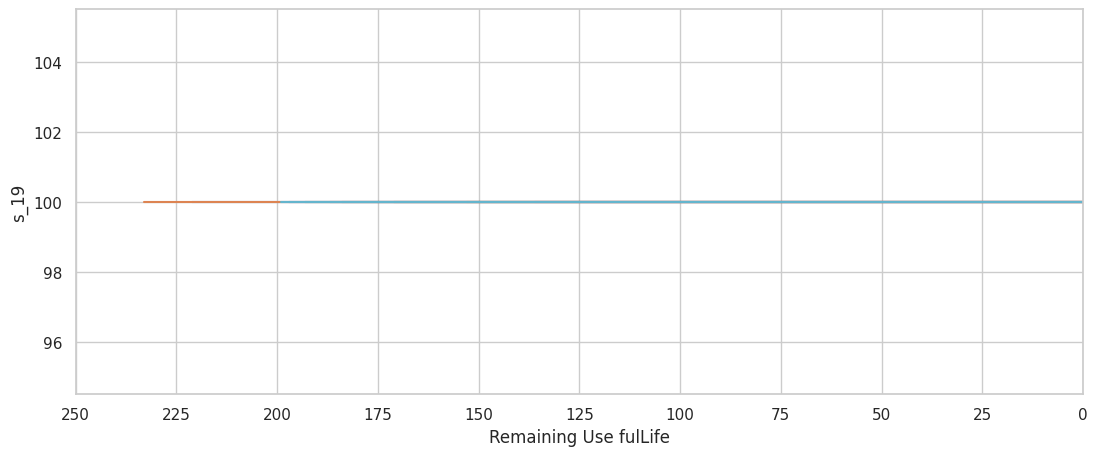

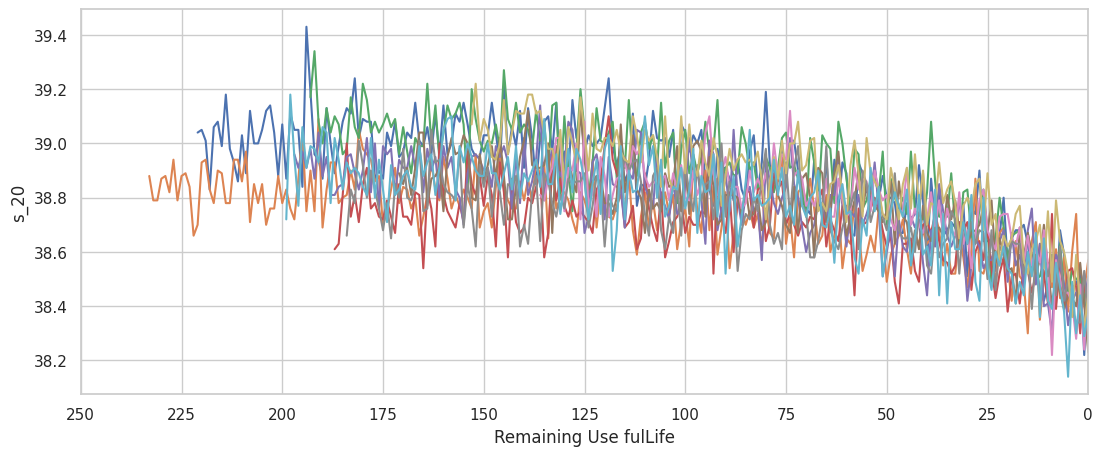

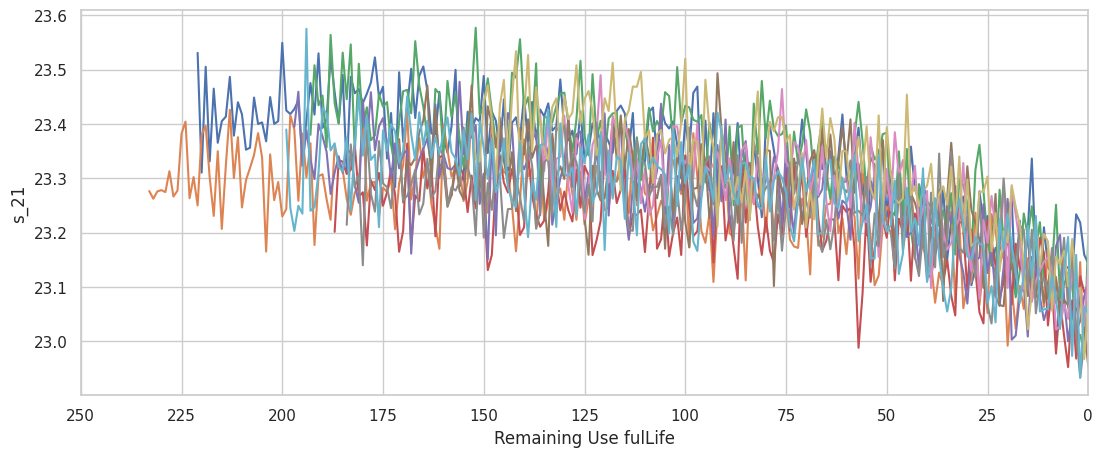

In [ ]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,5))
    for i in train['unit_nr'].unique():
        if (i % 10 == 0):  # only plot every 10th unit_nr
            plt.plot('RUL', sensor_name,
                     data=train[train['unit_nr']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

for sensor_name in sensor_names:
    plot_sensor(sensor_name)

D'après les graphiques, vous pouvez constater que les capteurs 1, 5, 6, 10, 16, 18 et 19 ne contiennent aucune information liée à la Durée de Vie Restante (RUL), car les valeurs des capteurs restent constantes au fil du temps.

Il est temps de créer notre modèle de référence en prenant en compte tous les capteurs contenant des informations pertinentes liées au RUL.

## Feature extraction



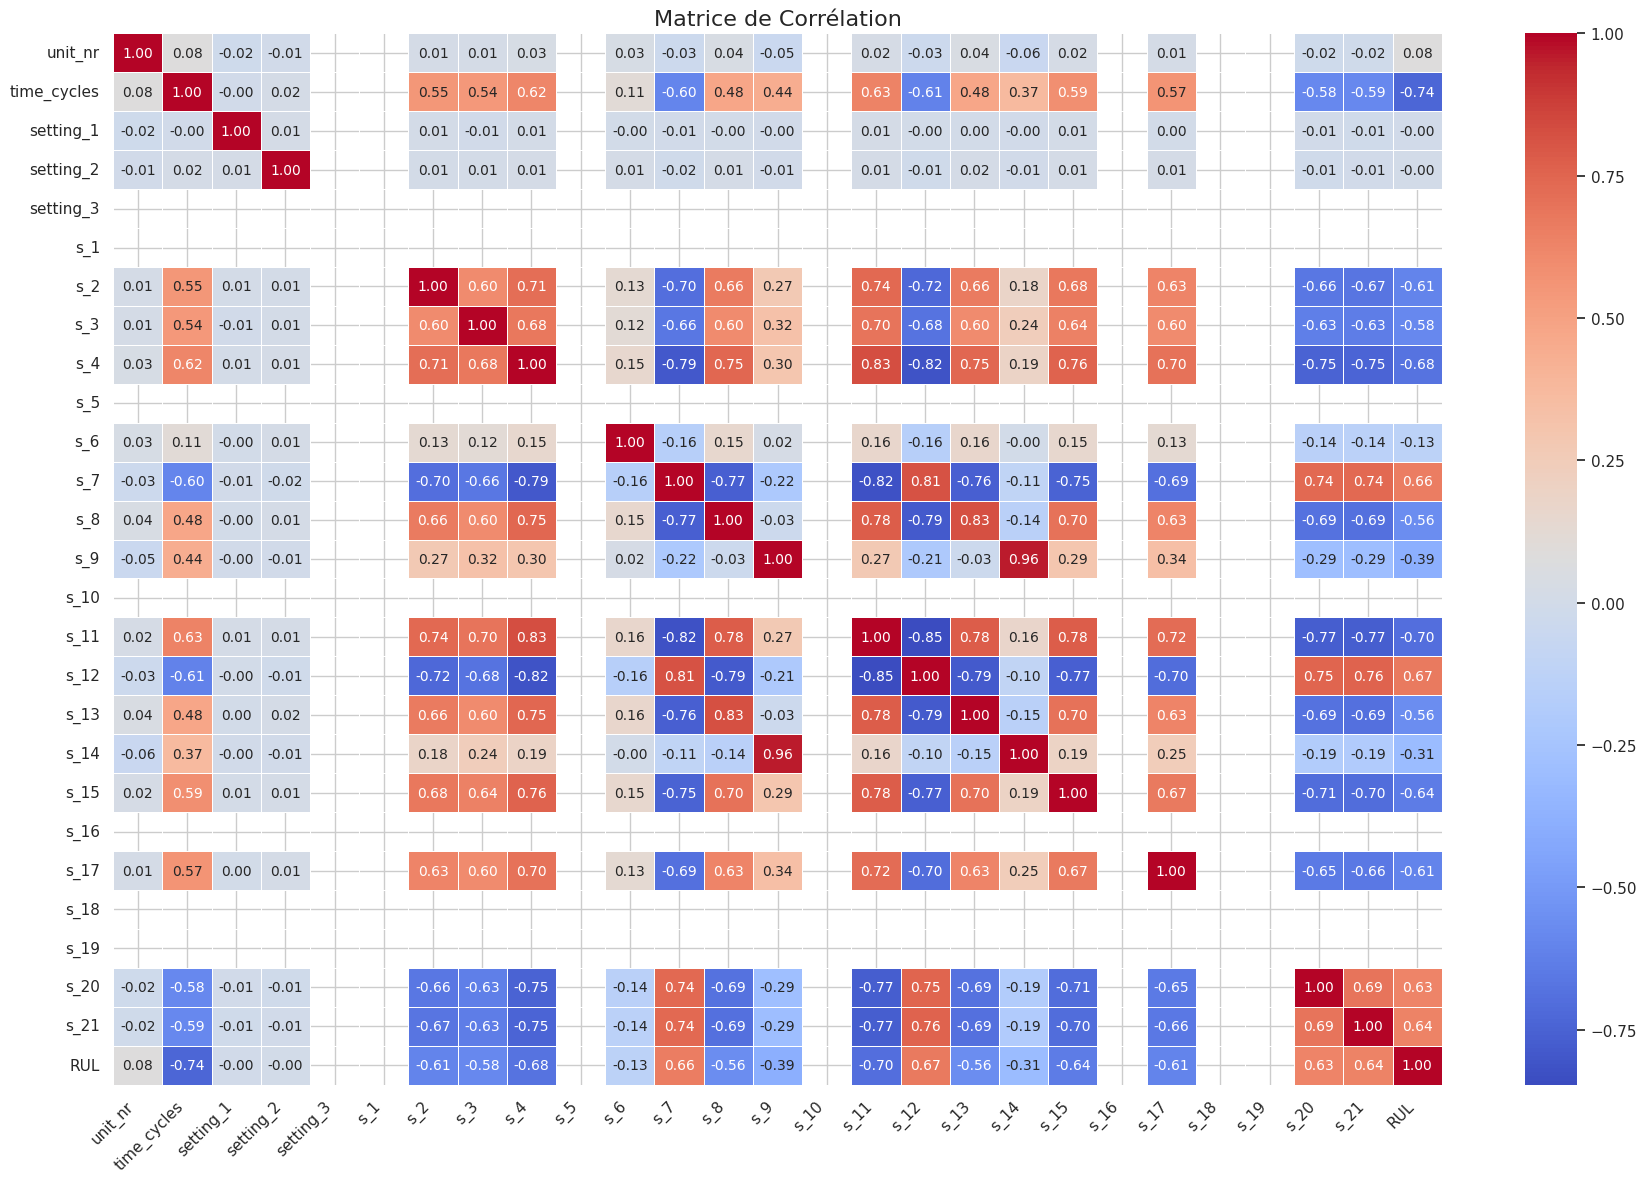

In [ ]:
def corr_matrix(data):

    plt.figure(figsize=(18, 12))  # Augmente la taille de la figure


    sns.heatmap(
        data.corr(),
        annot=True,
        fmt=".2f",  # Limite les nombres à 2 décimales
        cmap='coolwarm',
        annot_kws={"size": 10},  # Définit la taille des annotations
        linewidths=0.5  # Ajoute des séparateurs entre les cellules
    )
    plt.xticks(rotation=45, ha='right')  # Rend les labels plus lisibles
    plt.yticks(rotation=0)  # Labels y en orientation horizontale
    plt.title("Matrice de Corrélation", fontsize=16)  # Titre plus lisible
    plt.tight_layout()  # Évite les débordements
    plt.show()

# Utilisation
corr_matrix(train)


In [ ]:
# Calculer la matrice de corrélation
correlation = train.corr()

# Sélectionner les caractéristiques fortement corrélées avec 'RUL'
train_relevant_features = correlation[abs(correlation['RUL']) >= 0.5]

# Extraire uniquement la colonne pour 'RUL'
train_relevant_features['RUL']


time_cycles   -0.736241
s_2           -0.606484
s_3           -0.584520
s_4           -0.678948
s_7            0.657223
s_8           -0.563968
s_11          -0.696228
s_12           0.671983
s_13          -0.562569
s_15          -0.642667
s_17          -0.606154
s_20           0.629428
s_21           0.635662
RUL            1.000000
Name: RUL, dtype: float64

In [ ]:
# Création d'une liste contenant uniquement les caractéristiques importantes
list_relevant_features = train_relevant_features.index

list_relevant_features = list_relevant_features[1:]  # Exclut 'RUL' de la liste

# Conserver uniquement ces caractéristiques importantes dans le jeu d'entraînement
train = train[list_relevant_features]

# Séparer le jeu d'entraînement en x_train (caractéristiques) et y_train (RUL)
y_train = train['RUL']
x_train = train.drop(['RUL'], axis=1)

# Conserver uniquement les colonnes/caractéristiques de x_train dans le jeu de test
x_test = x_test[x_train.columns]

# Affichage des premières lignes de x_train
x_train.head()


s_2      s_3      s_4     s_7      s_8   s_11    s_12     s_13    s_15  \
0  641.82  1589.70  1400.60  554.36  2388.06  47.47  521.66  2388.02  8.4195   
1  642.15  1591.82  1403.14  553.75  2388.04  47.49  522.28  2388.07  8.4318   
2  642.35  1587.99  1404.20  554.26  2388.08  47.27  522.42  2388.03  8.4178   
3  642.35  1582.79  1401.87  554.45  2388.11  47.13  522.86  2388.08  8.3682   
4  642.37  1582.85  1406.22  554.00  2388.06  47.28  522.19  2388.04  8.4294   

   s_17   s_20     s_21  
0   392  39.06  23.4190  
1   392  39.00  23.4236  
2   390  38.95  23.3442  
3   392  38.88  23.3739  
4   393  38.90  23.4044

## Standardisation

In [ ]:
# Premièrement, créer une fonction d'évaluation
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))
    return rmse, variance

In [ ]:
# Standardisation des caractéristiques
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_trans = sc.fit_transform(x_train)
x_test_trans = sc.transform(x_test)


## Régression linéaire

train set RMSE:45.61466077800371, R2:0.5614378099126991
test set RMSE:33.30116107018101, R2:0.3578164045379343


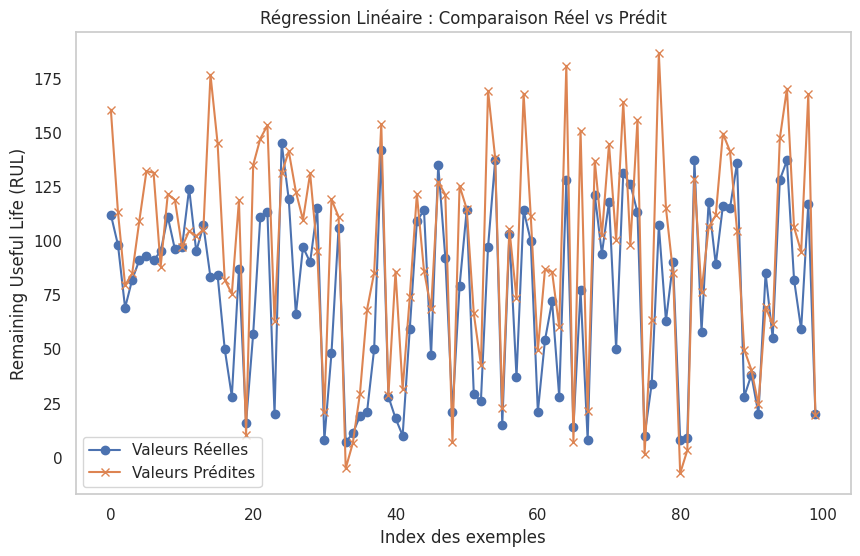

In [ ]:
# Modèle de régression linéaire
from sklearn.linear_model import LinearRegression
y_train_clipped = y_train.clip(upper =125)
lm = LinearRegression()
lm.fit(x_train_trans, y_train)

# Prédire et évaluer
y_hat_train = lm.predict(x_train_trans)
RMSE_Train, R2_Train = evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(x_test_trans)
RMSE_Test, R2_Test = evaluate(y_test, y_hat_test, 'test')

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Valeurs Réelles', marker='o')
plt.plot(range(len(y_test)), y_hat_test, label='Valeurs Prédites', marker='x')
plt.title("Régression Linéaire : Comparaison Réel vs Prédit")
plt.xlabel("Index des exemples")
plt.ylabel("Remaining Useful Life (RUL)")
plt.legend()
plt.grid()
plt.show()

train set RMSE:22.734164950962253, R2:0.7023848970100307
test set RMSE:22.91426532858463, R2:0.6959448729951724


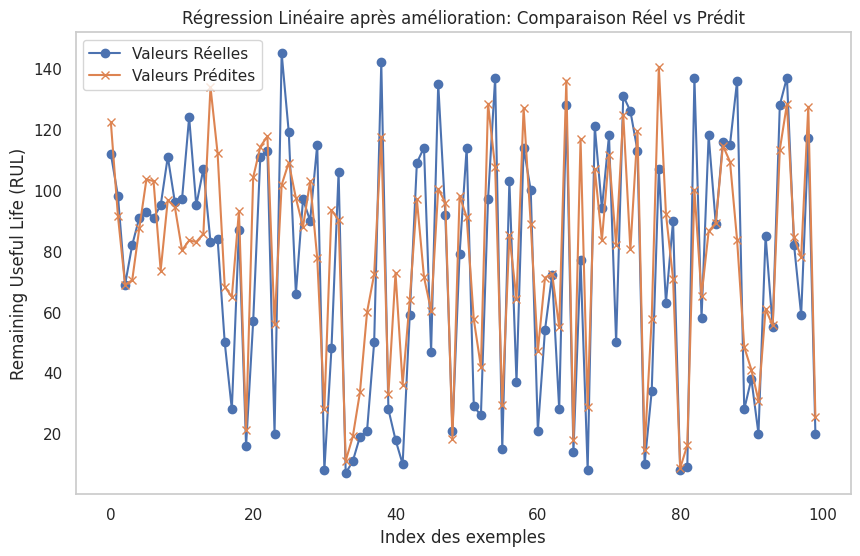

In [ ]:
# Modèle de régression linéaire clipped
from sklearn.linear_model import LinearRegression
y_train_clipped = y_train.clip(upper =125)
lm = LinearRegression()
lm.fit(x_train_trans, y_train_clipped)

# Prédire et évaluer
y_hat_train = lm.predict(x_train_trans)
RMSE_Train, R2_Train = evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = lm.predict(x_test_trans)
RMSE_Test, R2_Test = evaluate(y_test, y_hat_test, 'test')

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Valeurs Réelles', marker='o')
plt.plot(range(len(y_test)), y_hat_test, label='Valeurs Prédites', marker='x')
plt.title("Régression Linéaire après amélioration: Comparaison Réel vs Prédit")
plt.xlabel("Index des exemples")
plt.ylabel("Remaining Useful Life (RUL)")
plt.legend()
plt.grid()
plt.show()

## Régression polynomiale

train set RMSE:42.89372356002194, R2:0.6121982317015551
test set RMSE:34.87992039035812, R2:0.29548308312467775


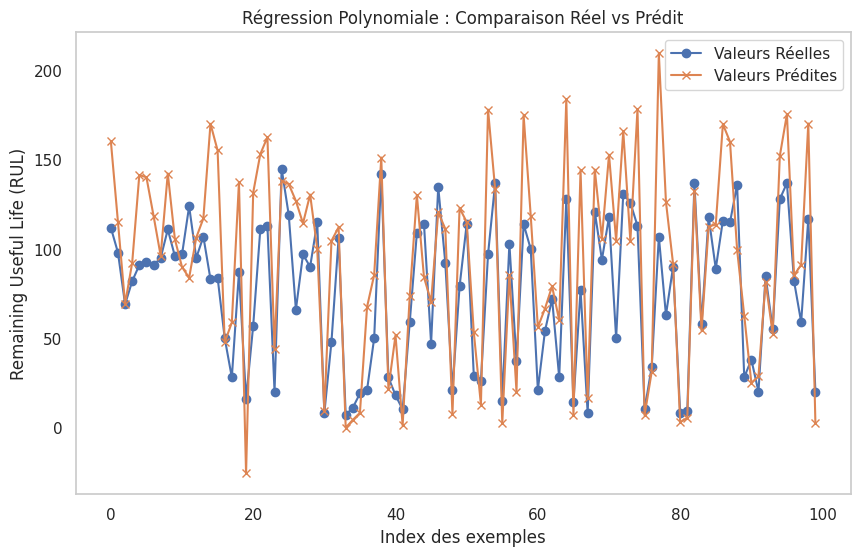

In [ ]:
# Régression polynomiale
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Définir les caractéristiques polynomiales avec un degré de 4
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x_train_trans)

# Créer le modèle de régression linéaire
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_train)

# Prédire et évaluer
y_hat_train = lin_reg_2.predict(x_poly)
RMSE_Train, R2_Train = evaluate(y_train, y_hat_train, 'train')

y_hat_test = lin_reg_2.predict(poly_reg.fit_transform(x_test_trans))
RMSE_Test, R2_Test = evaluate(y_test, y_hat_test, 'test')

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Valeurs Réelles', marker='o')
plt.plot(range(len(y_test)), y_hat_test, label='Valeurs Prédites', marker='x')
plt.title("Régression Polynomiale : Comparaison Réel vs Prédit")
plt.xlabel("Index des exemples")
plt.ylabel("Remaining Useful Life (RUL)")
plt.legend()
plt.grid()
plt.show()

train set RMSE:19.99963891235301, R2:0.7696749032353548
test set RMSE:21.268900986690923, R2:0.7380426702852014


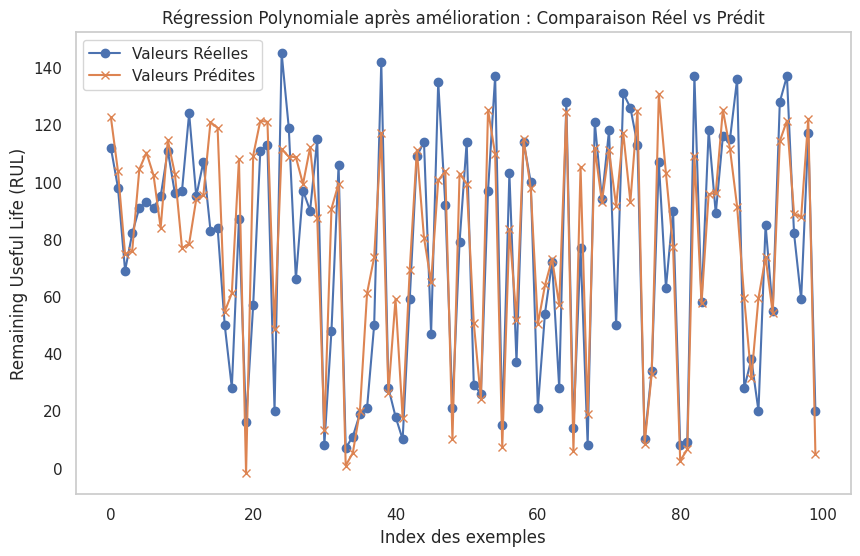

In [ ]:
# Régression polynomiale clipped
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Définir les caractéristiques polynomiales avec un degré de 4
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x_train_trans)

# Créer le modèle de régression linéaire
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_train_clipped)

# Prédire et évaluer
y_hat_train = lin_reg_2.predict(x_poly)
RMSE_Train, R2_Train = evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = lin_reg_2.predict(poly_reg.fit_transform(x_test_trans))
RMSE_Test, R2_Test = evaluate(y_test, y_hat_test, 'test')

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Valeurs Réelles', marker='o')
plt.plot(range(len(y_test)), y_hat_test, label='Valeurs Prédites', marker='x')
plt.title("Régression Polynomiale après amélioration : Comparaison Réel vs Prédit")
plt.xlabel("Index des exemples")
plt.ylabel("Remaining Useful Life (RUL)")
plt.legend()
plt.grid()
plt.show()

## Régression par Support Vector Machine (SVR)


test set RMSE:45.28091055080134, R2:0.5678320152955884
test set RMSE:28.043979046613842, R2:0.5445720042978831


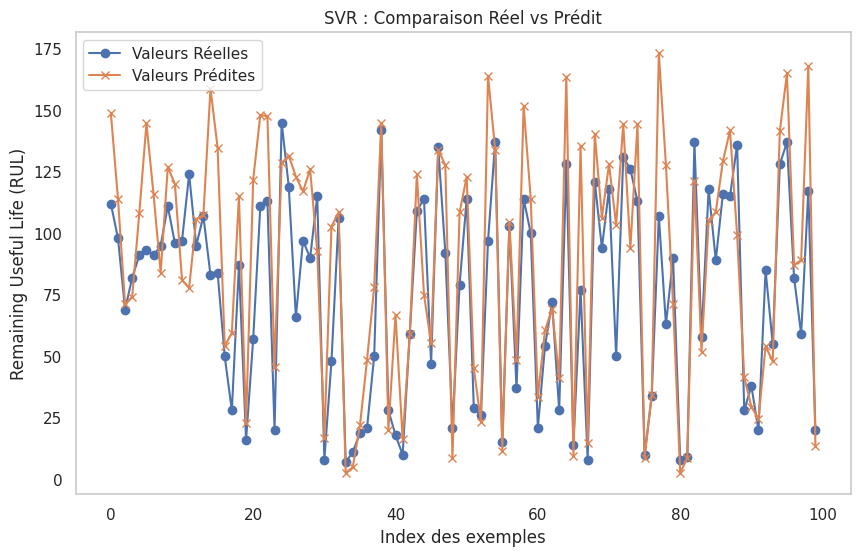

In [ ]:
# SVR
from sklearn.svm import SVR

# Création du modèle
regressor = SVR(kernel='rbf')

# Entraînement
regressor.fit(x_train_trans, y_train)

# Prédictions et évaluation
y_hat_train = regressor.predict(x_train_trans)
RMSE_Train, R2_Train = evaluate(y_train, y_hat_train)

y_hat_test = regressor.predict(x_test_trans)
RMSE_Test, R2_Test = evaluate(y_test, y_hat_test)

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Valeurs Réelles', marker='o')
plt.plot(range(len(y_test)), y_hat_test, label='Valeurs Prédites', marker='x')
plt.title("SVR : Comparaison Réel vs Prédit")
plt.xlabel("Index des exemples")
plt.ylabel("Remaining Useful Life (RUL)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#feature engineering
from sklearn.preprocessing import PolynomialFeatures
# 2nd degree polynomialFeatures of [a, b] becomes [1, a, b, a^2, ab, b^2]
poly = PolynomialFeatures(2)
X_train_transformed = poly.fit_transform(x_train_trans)
X_test_transformed = poly.fit_transform(x_test_trans)

print(x_train_trans.shape)
print(X_train_transformed.shape)

(20631, 12)
(20631, 91)


In [ ]:
# SVM + clipped RUL + engineered features
# SVR
from sklearn.svm import SVR

# Création du modèle
regressor = SVR(kernel='rbf')

# Entraînement
regressor.fit(X_train_transformed, y_train_clipped)

# Prédictions et évaluation
y_hat_train = regressor.predict(X_train_transformed)
RMSE_Train, R2_Train = evaluate(y_train_clipped, y_hat_train)

y_hat_test = regressor.predict(X_test_transformed)
RMSE_Train, R2_Train = evaluate(y_test, y_hat_test)


test set RMSE:22.22671798447902, R2:0.7155226909184534
test set RMSE:22.040010751014645, R2:0.7187036740325724


In [ ]:
from sklearn.feature_selection import SelectFromModel
# Use 'linear' kernel instead of 'rbf' for feature selection
regressor_linear = SVR(kernel='linear')
regressor_linear.fit(X_train_transformed, y_train_clipped)

select_features = SelectFromModel(regressor_linear, threshold='mean', prefit=True)
select_features.get_support()

# Use get_feature_names_out() instead of get_feature_names() for scikit-learn >= 0.24
try:
    feature_names = poly.get_feature_names_out()  # For scikit-learn >= 0.24
except AttributeError:
    feature_names = poly.get_feature_names()  # For older scikit-learn versions

# Use the original DataFrame variable name (x_train)
print('Original features:\n', x_train.columns)
print('Best features:\n', np.array(feature_names)[select_features.get_support()])
np.array(feature_names)[select_features.get_support()].shape

Original features:
 Index(['s_2', 's_3', 's_4', 's_7', 's_8', 's_11', 's_12', 's_13', 's_15',
       's_17', 's_20', 's_21'],
      dtype='object')
Best features:
 ['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x0 x11'
 'x2 x4' 'x3 x8' 'x4^2' 'x4 x6' 'x4 x7' 'x4 x9' 'x4 x11' 'x7^2' 'x7 x9']


(22,)

train set RMSE:21.315733495249123, R2:0.7383639906120911
test set RMSE:21.491752051437246, R2:0.7325244440920975


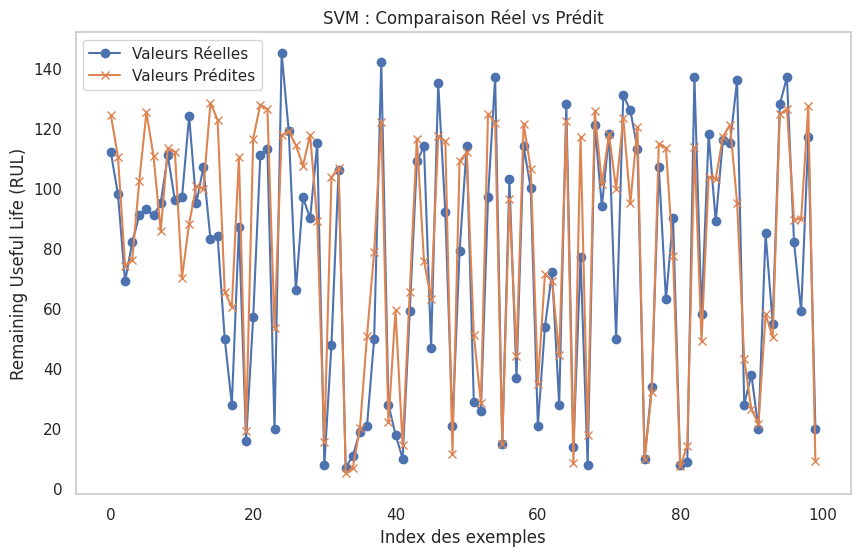

In [ ]:
# SVM regression + clipped RUL + engineered features + selection
svr = SVR(kernel='rbf')
svr.fit(X_train_transformed[:, select_features.get_support()], y_train_clipped)

# predict and evaluate
y_hat_train = svr.predict(X_train_transformed[:, select_features.get_support()])
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test_transformed[:, select_features.get_support()])
evaluate(y_test, y_hat_test)

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Valeurs Réelles', marker='o')
plt.plot(range(len(y_test)), y_hat_test, label='Valeurs Prédites', marker='x')
plt.title("SVM : Comparaison Réel vs Prédit")
plt.xlabel("Index des exemples")
plt.ylabel("Remaining Useful Life (RUL)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
print('Valeur de epsilon par défaut :',svr.epsilon)

Valeur de epsilon par défaut : 0.1


In [ ]:
#Amélioration de SVR (epsilon)
epsilon = [0.4, 0.3, 0.2, 0.1, 0.05]

for e in epsilon:
    svr = SVR(kernel='rbf', epsilon=e)
    svr.fit(X_train_transformed[:, select_features.get_support()], y_train_clipped)

    # predict and evaluate
    y_hat = svr.predict(X_train_transformed[:, select_features.get_support()])
    mse = mean_squared_error(y_train_clipped, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_train_clipped, y_hat)
    print("epsilon:", e, "RMSE:", rmse, "R2:", variance)



epsilon: 0.4 RMSE: 21.322980468778177 R2: 0.7381860571105527
epsilon: 0.3 RMSE: 21.318266407798358 R2: 0.7383018073890286
epsilon: 0.2 RMSE: 21.316963712317765 R2: 0.7383337895990437
epsilon: 0.1 RMSE: 21.315733495249123 R2: 0.7383639906120911
epsilon: 0.05 RMSE: 21.316025325010557 R2: 0.7383568265427067


##Régression par Support Vector Machine à kernel linéaire


test set RMSE:22.162170961367607, R2:0.7171725522550236
test set RMSE:23.00194785161634, R2:0.6936134581508194


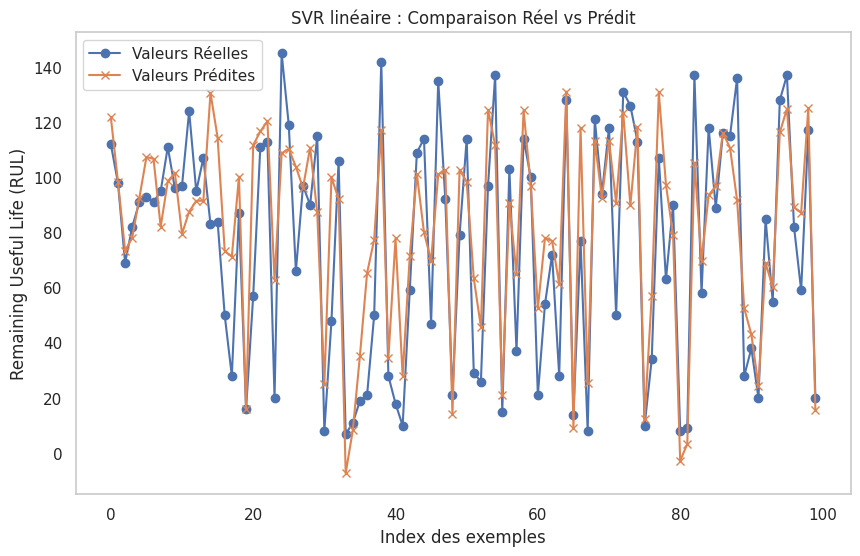

In [ ]:
# SVM lineaire + clipped RUL + engineered features
# SVR
from sklearn.svm import SVR

# Création du modèle
regressor = SVR(kernel='linear')

# Entraînement
regressor.fit(X_train_transformed, y_train_clipped)

# Prédictions et évaluation
y_hat_train = regressor.predict(X_train_transformed)
RMSE_Train, R2_Train = evaluate(y_train_clipped, y_hat_train)

y_hat_test = regressor.predict(X_test_transformed)
RMSE_Train, R2_Train = evaluate(y_test, y_hat_test)

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Valeurs Réelles', marker='o')
plt.plot(range(len(y_test)), y_hat_test, label='Valeurs Prédites', marker='x')
plt.title("SVR linéaire : Comparaison Réel vs Prédit")
plt.xlabel("Index des exemples")
plt.ylabel("Remaining Useful Life (RUL)")
plt.legend()
plt.grid()
plt.show()

## Régression par Decision tree


train set RMSE:36.77513644517892, R2:0.7149435492153497
test set RMSE:38.31216453330952, R2:0.150009965299418


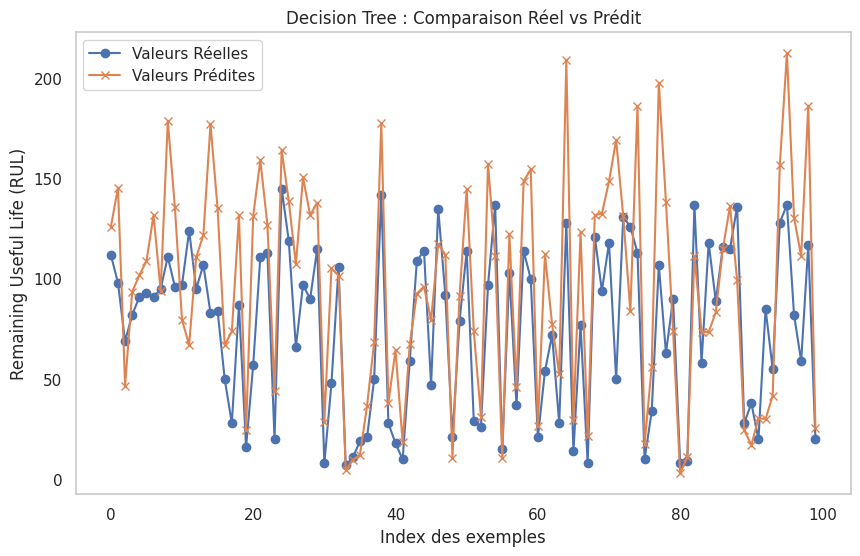

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Création du modèle
dt = DecisionTreeRegressor(random_state=42, max_depth=15, min_samples_leaf=10)

# Entraînement
dt.fit(x_train_trans, y_train)

# Prédictions et évaluation
y_hat_train = dt.predict(x_train_trans)
RMSE_Train, R2_Train = evaluate(y_train, y_hat_train, 'train')

y_hat_test = dt.predict(x_test_trans)
RMSE_Test, R2_Test = evaluate(y_test, y_hat_test)

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Valeurs Réelles', marker='o')
plt.plot(range(len(y_test)), y_hat_test, label='Valeurs Prédites', marker='x')
plt.title("Decision Tree : Comparaison Réel vs Prédit")
plt.xlabel("Index des exemples")
plt.ylabel("Remaining Useful Life (RUL)")
plt.legend()
plt.grid()
plt.show()

## Régression par Random forest

train set RMSE:44.793331149655884, R2:0.5770889724209527
test set RMSE:32.428457352689044, R2:0.391034015379521


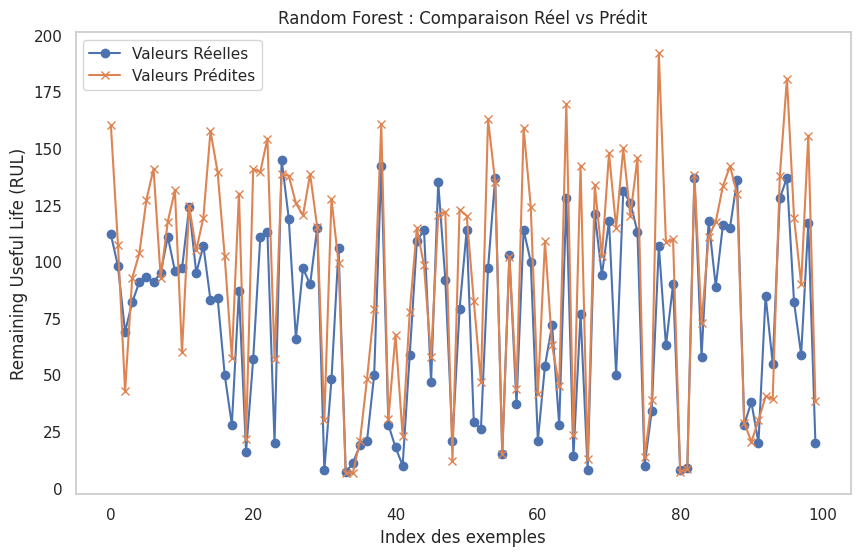

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Création du modèle
rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=6, min_samples_leaf=5)

# Entraînement
rf.fit(x_train_trans, y_train)

# Prédictions et évaluation
y_hat_train = rf.predict(x_train_trans)
RMSE_Train, R2_Train = evaluate(y_train, y_hat_train, 'train')

y_hat_test = rf.predict(x_test_trans)
RMSE_Test, R2_Test = evaluate(y_test, y_hat_test)

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Valeurs Réelles', marker='o')
plt.plot(range(len(y_test)), y_hat_test, label='Valeurs Prédites', marker='x')
plt.title("Random Forest : Comparaison Réel vs Prédit")
plt.xlabel("Index des exemples")
plt.ylabel("Remaining Useful Life (RUL)")
plt.legend()
plt.grid()
plt.show()

## Artificial Neural Network (ANN)

Epoch 1/75
645/645 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 14550.5420
Epoch 2/75
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4617.2524
Epoch 3/75
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2786.1223
Epoch 4/75
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2183.7776
Epoch 5/75
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2044.2255
Epoch 6/75
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2049.2278
Epoch 7/75
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2087.3677
Epoch 8/75
645/645 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2054.7219
Epoch 9/75
645/645 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2068.0691
Epoch 10/75
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1993.9265
Epoch 11/75
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2000.6903
Epoch 12/75
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1991.6910
Epoch 13/75
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1951.5691
Epoch 14/75
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2000.8083
Epoch 15/75
64

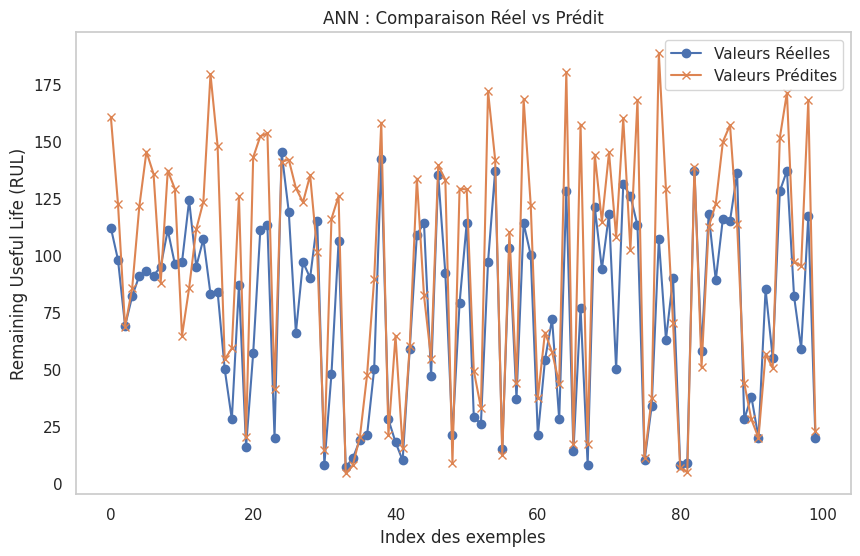

In [ ]:
# Réseau de neurones artificiels (ANN)
import tensorflow as tf

# Création du modèle séquentiel
ann = tf.keras.models.Sequential()

# Ajout des couches cachées avec activation ReLU
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

# Ajout de la couche de sortie
ann.add(tf.keras.layers.Dense(units=1))

# Compilation du modèle avec l'optimiseur Adam et une fonction de perte MSE
ann.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement du modèle
ann.fit(x_train_trans, y_train, batch_size=32, epochs=75)

# Prédictions et évaluation pour les données d'entraînement
y_hat_train = ann.predict(x_train_trans)
RMSE_Train, R2_Train = evaluate(y_train, y_hat_train, 'train')

# Prédictions et évaluation pour les données de test
y_hat_test = ann.predict(x_test_trans)
RMSE_Test, R2_Test = evaluate(y_test, y_hat_test, 'test')

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Valeurs Réelles', marker='o')
plt.plot(range(len(y_test)), y_hat_test, label='Valeurs Prédites', marker='x')
plt.title("ANN : Comparaison Réel vs Prédit")
plt.xlabel("Index des exemples")
plt.ylabel("Remaining Useful Life (RUL)")
plt.legend()
plt.grid()
plt.show()

## KNN

Valeur optimale de k: 13 avec RMSE = 32.2144
train set RMSE:42.915954449778724, R2:0.6117961489851103
test set RMSE:32.214406531328194, R2:0.3990466980450169


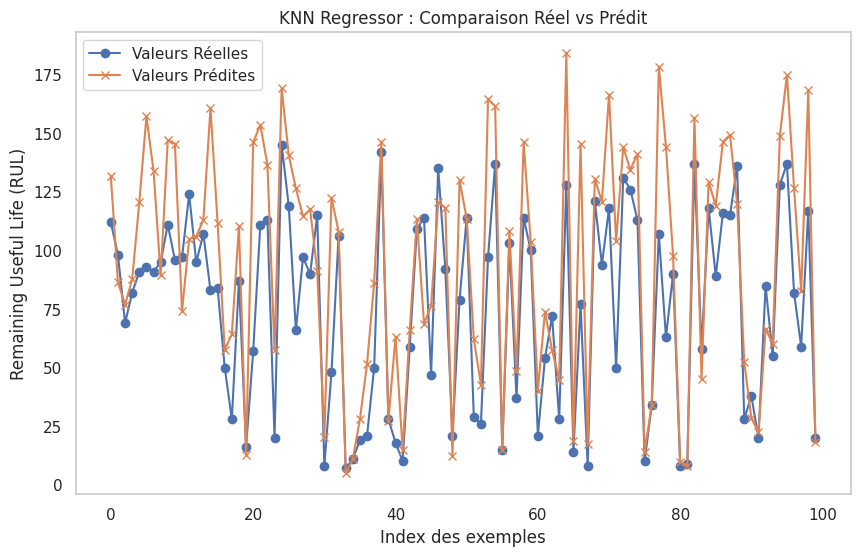

In [ ]:
# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

# Étape 1 : Choisir la valeur optimale de k
k_values = range(1, 21)  # Tester k de 1 à 20
errors = []

# Tester chaque valeur de k
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_trans, y_train)
    y_pred = knn.predict(x_test_trans)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    errors.append(rmse)

# Déterminer la valeur optimale de k
optimal_k = k_values[np.argmin(errors)]
print(f"Valeur optimale de k: {optimal_k} avec RMSE = {min(errors):.4f}")

# Étape 2 : Création du modèle avec k optimal
knn = KNeighborsRegressor(n_neighbors=optimal_k)

# Entraînement
knn.fit(x_train_trans, y_train)

# Prédictions et évaluation pour les données d'entraînement
y_hat_train = knn.predict(x_train_trans)
RMSE_Train, R2_Train = evaluate(y_train, y_hat_train, 'train')

# Prédictions et évaluation pour les données de test
y_hat_test = knn.predict(x_test_trans)
RMSE_Test, R2_Test = evaluate(y_test, y_hat_test, 'test')

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Valeurs Réelles', marker='o')
plt.plot(range(len(y_test)), y_hat_test, label='Valeurs Prédites', marker='x')
plt.title("KNN Regressor : Comparaison Réel vs Prédit")
plt.xlabel("Index des exemples")
plt.ylabel("Remaining Useful Life (RUL)")
plt.legend()
plt.grid()
plt.show()